In [21]:
%pip install ucimlrepo pandas matplotlib numpy scipy seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ucimlrepo in c:\users\sidor\appdata\local\programs\python\python312\lib\site-packages (0.0.7)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 409.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 476.3 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 607.9 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 731.4 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 912.4 kB/s eta 0:00:00




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

fetched_data = fetch_ucirepo(id=45) 

heart_disease = fetched_data.data.features
heart_disease : pd.DataFrame

print(heart_disease.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None


In [29]:
print(heart_disease.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

In [30]:
print(heart_disease.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


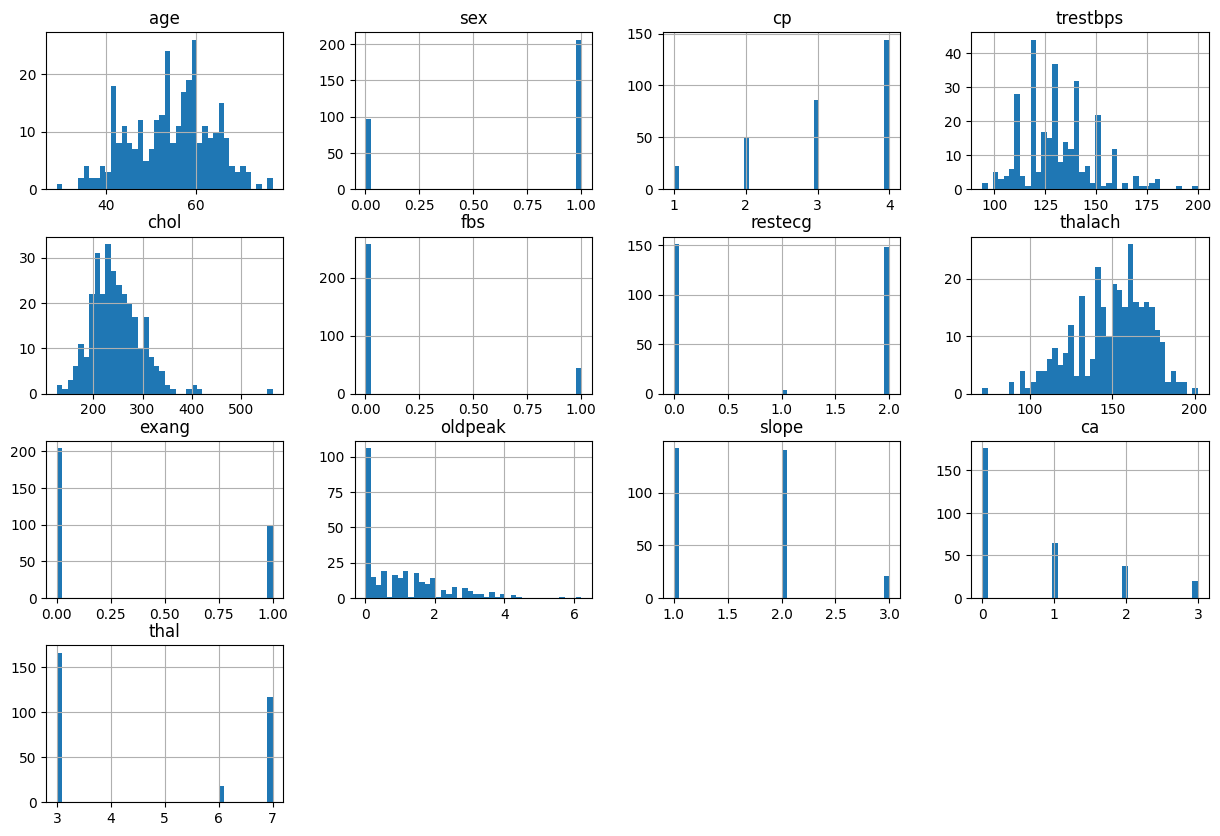

In [38]:
import matplotlib.pyplot as plt

heart_disease.hist(figsize=(15, 10), bins=40)
plt.show()

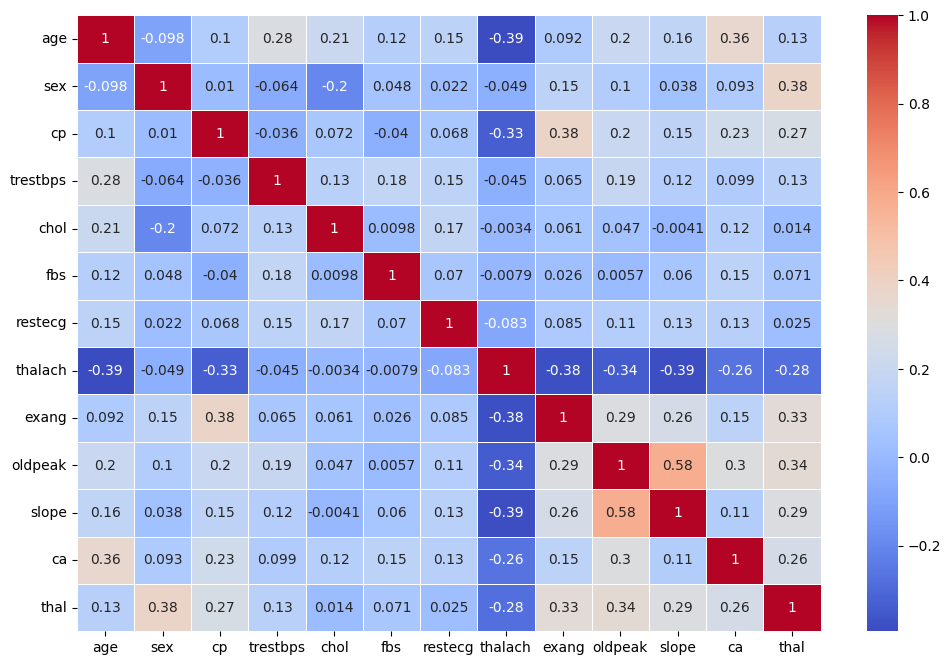

In [40]:
import seaborn as sns

corr_matrix = heart_disease.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

## Гипотеза 1. У мужчин уровень холестерина выше, чем у женщин

### H0 : Средний уровень холестерина у мужчин и женщин одинаковый

### H1 : Средний уровень холестерина у мужчин выше, чем у женщин

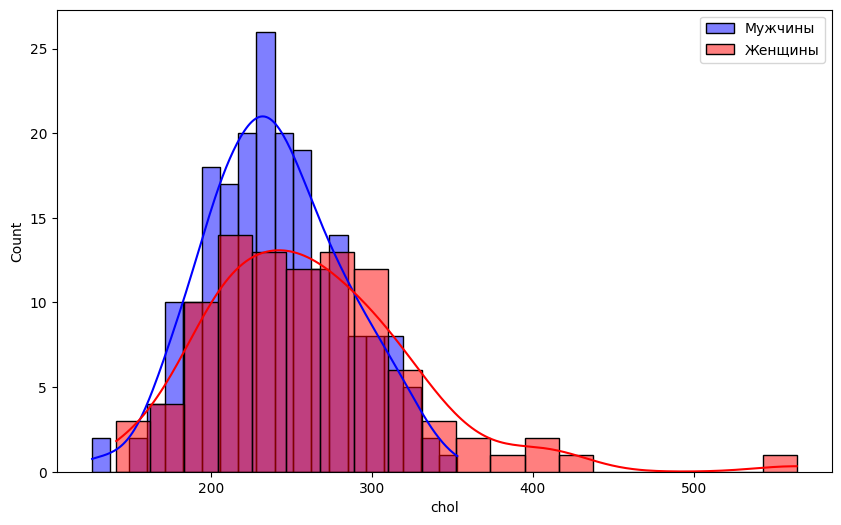

In [55]:
group_male = heart_disease[heart_disease['sex'] == 1]['chol']
group_female = heart_disease[heart_disease['sex'] == 0]['chol']

plt.figure(figsize=(10, 6))

# Гистограмма для мужчин
sns.histplot(group_male, color='blue', kde=True, label='Мужчины', bins=20)

# Гистограмма для женщин
sns.histplot(group_female, color='red', kde=True, label='Женщины', bins=20)


plt.legend()
plt.show()

<Axes: xlabel='sex', ylabel='chol'>

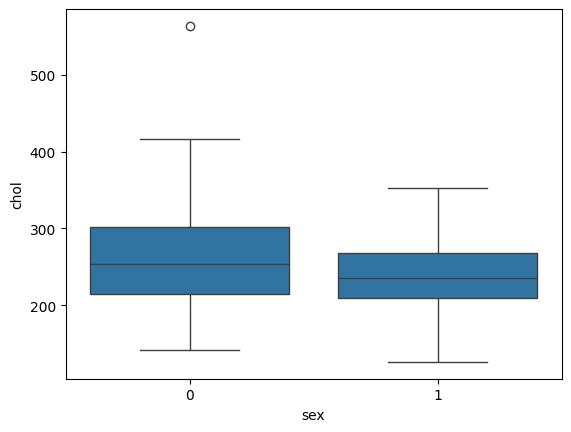

In [52]:
sns.boxplot(x=heart_disease['sex'], y=heart_disease['chol'])

Данные распределены нормально, проводим T-test

In [58]:
from scipy.stats import ttest_ind

alpha = 0.05

t_stat, p_value = ttest_ind(group_male, group_female, equal_var=False)

print(f"t_stat={t_stat}, p_value={p_value}")

if p_value < alpha:
    print("Нулевая гипотеза отвергается. Уровень холестерина у мужчин и женщин различается.")
else:
    print("Нулевая гипотеза не отвергается. Различий в уровне холестерина между мужчинами и женщинами нет.")

t_stat=-3.06426332754255, p_value=0.002630521121607227
Нулевая гипотеза отвергается. Уровень холестерина у мужчин и женщин различается.


## Гипотеза 2. Возраст влияет на уровень артериального давления в состоянии покоя.

### H0 : Возвраст не влияет на уровень артериального давления

### H1 : Возвраст влияет на уровень артериального давления

<Axes: xlabel='age', ylabel='trestbps'>

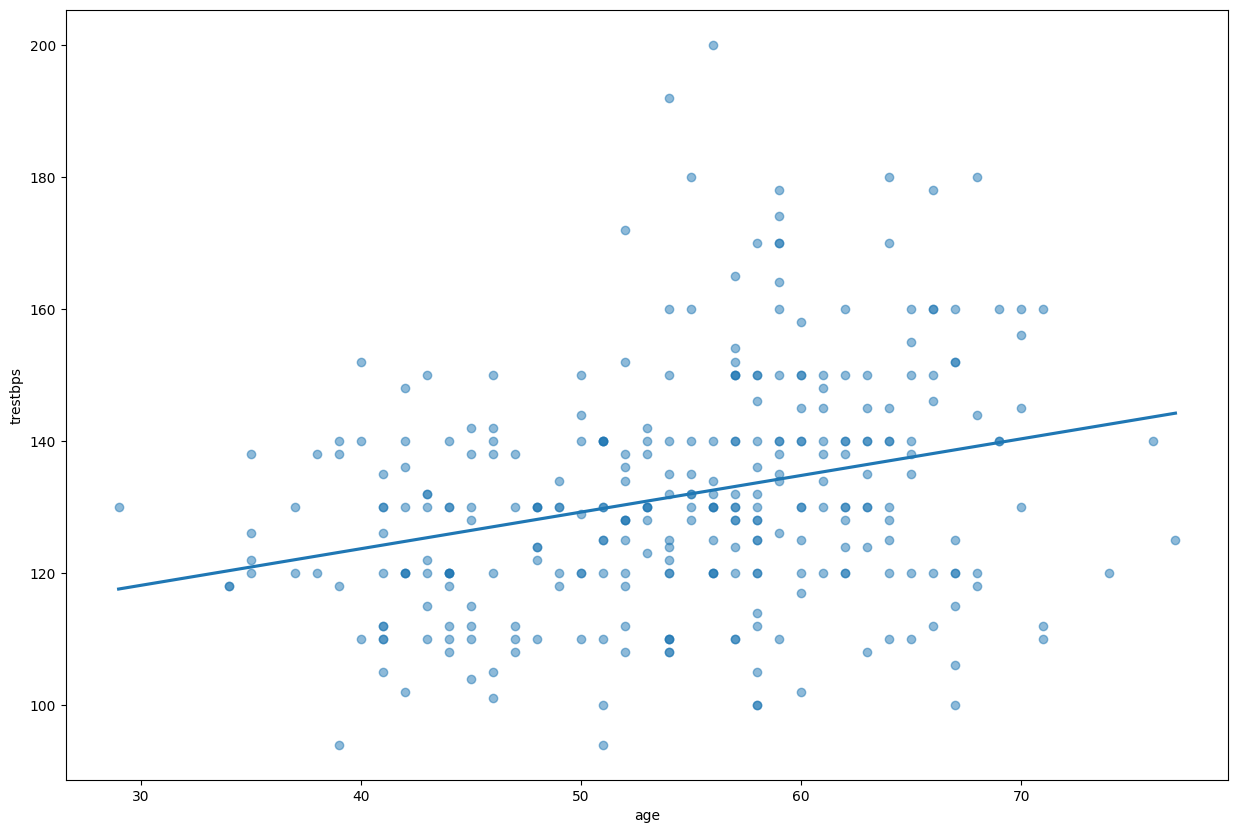

In [65]:
age = heart_disease['age']
trestbps = heart_disease['trestbps']

plt.figure(figsize=(15, 10))
sns.regplot(x=age, y=trestbps, ci=None, scatter_kws={'alpha':0.5})

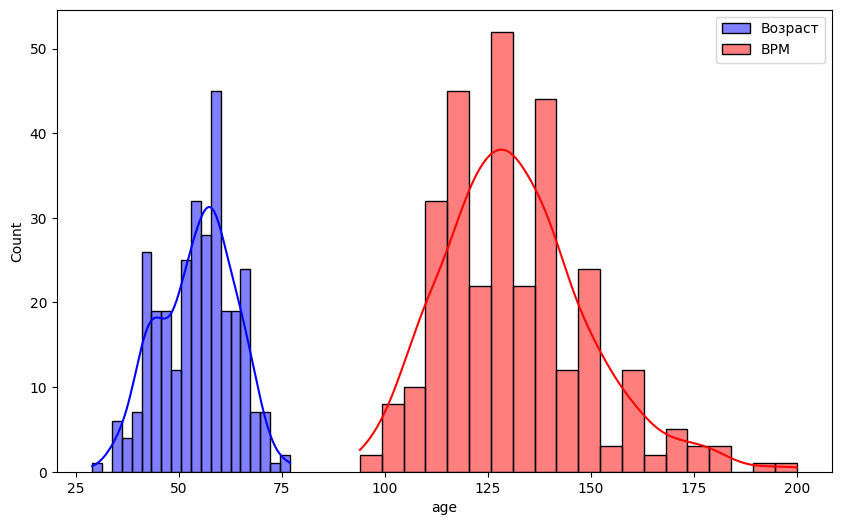

In [62]:
plt.figure(figsize=(10, 6))


sns.histplot(age, color='blue', kde=True, label='Возраст', bins=20)
sns.histplot(trestbps, color='red', kde=True, label='BPM', bins=20)

plt.legend()
plt.show()

In [67]:
from scipy.stats import pearsonr, spearmanr

alpha = 0.05

corr, p_value = spearmanr(age, trestbps)

print(f"corr={corr}, p_value={p_value}")


if p_value < 0.05:
    print("Существует корреляция между возрастом и уровнем артериального давления.")
else:
    print("Нет корреляции между возрастом и уровнем артериального давления.")


corr=0.29218326471011025, p_value=2.237728251954262e-07
Существует корреляция между возрастом и уровнем артериального давления.


## Гипотеза 3: Количество крупных сосудов связано с уровнем холестерина.

### H0: Количество крупных сосудов не связано с уровнем холестерина.
### H1: Количество крупных сосудов связано с уровнем холестерина.

In [77]:
import pandas as pd
from scipy.stats import chi2_contingency

def categorize_cholesterol(chol):
    if chol < 200:
        return 'Low'
    elif chol < 240:
        return 'Normal'
    else:
        return 'High'


heart_disease['chol_category'] = heart_disease['chol'].apply(categorize_cholesterol)

contingency_table = pd.crosstab(heart_disease['ca'], heart_disease['chol_category'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"chi2_stat: {chi2_stat}, p-value: {p_value}")


if p_value < 0.05:
    print("Существует зависимость между количеством крупных сосудов и категорией уровня холестерина.")
else:
    print("Нет зависимости между количеством крупных сосудов и категорией уровня холестерина.")

chi2_stat: 4.797979903823893, p-value: 0.5699726618016023
Нет зависимости между количеством крупных сосудов и категорией уровня холестерина.


### Гипотеза 4. Уровень холестерина у людей, поступивших с болью после физических нагрузок не отличается от уровня холестерина у людей, поступивших с болью без физ нагрузок

u_stat: 11156.0, p-value: 0.1392753527633523
Нет оснований для отклонения нулевой гипотезы:


C:\Users\sidor\AppData\Local\Temp\ipykernel_5804\3507259275.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heart_disease, x='exang', y='chol', palette='Set2')


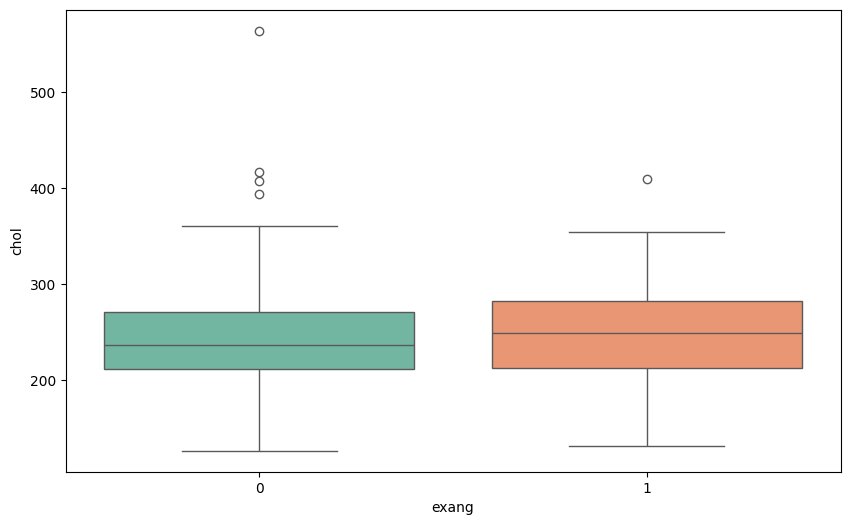

In [76]:
import pandas as pd
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt


group_angina = heart_disease[heart_disease['exang'] == 1]['chol']
group_no_angina = heart_disease[heart_disease['exang'] == 0]['chol']

u_stat, p_value = mannwhitneyu(group_angina, group_no_angina)

print(f"u_stat: {u_stat}, p-value: {p_value}")


if p_value < 0.05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований для отклонения нулевой гипотезы:")

plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_disease, x='exang', y='chol', palette='Set2')
plt.show()

chi2_stat: 5.825653331982741, p-value: 0.015794101260699973
Пол и наличие стенокардии при физической нагрузке зависимы друг от друга.


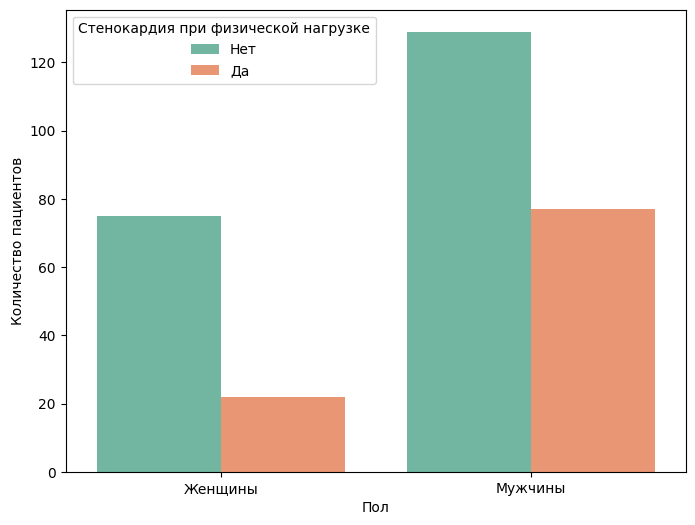

In [75]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(heart_disease['sex'], heart_disease['exang'])


chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f"chi2_stat: {chi2_stat}, p-value: {p_value}")


if p_value < 0.05:
    print("Пол и наличие стенокардии при физической нагрузке зависимы друг от друга.")
else:
    print("Пол и наличие стенокардии при физической нагрузке независимы друг от друга.")

plt.figure(figsize=(8, 6))
sns.countplot(data=heart_disease, x='sex', hue='exang', palette='Set2')
plt.xlabel('Пол')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1], labels=['Женщины', 'Мужчины'])
plt.legend(title='Стенокардия при физической нагрузке', labels=['Нет', 'Да'])
plt.show()